# Basic Mathmatics by Python 10-11
KGSOC「数理・データサイエンスのための基礎数学」参考資料

石田　淳 (aishida@kwansei.ac.jp)

## 10章　積分

`sympy`パッケージを使って積分演算する．積分演算のクラスは`Integral`，関数は`integrate`．

In [1]:
from sympy import *
x = symbols('x')

In [2]:
f = x**2
F = integrate(f,x) #Integral(f).doit()
Eq(Integral(f,x),F)

Eq(Integral(x**2, x), x**3/3)

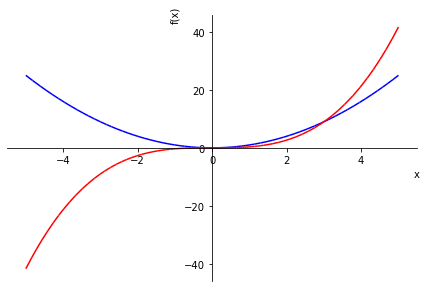

In [3]:
p = plot(f,(x,-5,5),line_color = 'b', show = False)
p.extend(plot(F,(x,-5,5),line_color = 'r', show = False))
p.show()

定積分を行う．

In [4]:
Eq(Integral(f,(x,0,1)),F.subs(x,1)-F.subs(x,0)) #integrate(f,(x,0,1))

Eq(Integral(x**2, (x, 0, 1)), 1/3)

標準正規分布

In [5]:
stdnorm_pdf = 1/sqrt(2 * pi) * exp(- (x **2)/2)
stdnorm_cdf = integrate(stdnorm_pdf, (x, -oo, x))
Eq(Integral(stdnorm_pdf,(x, -oo, x)),stdnorm_cdf)

Eq(Integral(sqrt(2)*exp(-x**2/2)/(2*sqrt(pi)), (x, -oo, x)), erf(sqrt(2)*x/2)/2 + 1/2)

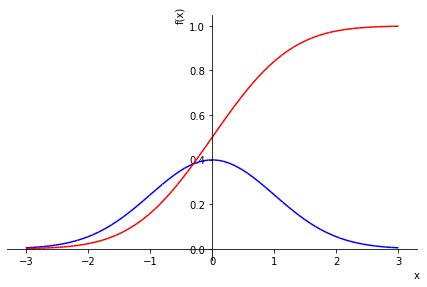

In [6]:
p = plot(stdnorm_pdf,(x,-3,3),line_color = 'b', show = False)
p.extend(plot(stdnorm_cdf, (x,-3,3),line_color = 'r', show = False))
p.show()

## 11章　指数と対数

In [7]:
from sympy import *
x = symbols('x')

指数関数

In [8]:
Exp = exp(x)
Eq(Derivative(Exp),diff(Exp,x))

Eq(Derivative(exp(x), x), exp(x))

In [9]:
Eq(Integral(Exp),integrate(Exp,x))

Eq(Integral(exp(x), x), exp(x))

対数関数

In [10]:
Log = log(x)
Eq(Derivative(Log),diff(Log,x))

Eq(Derivative(log(x), x), 1/x)

In [11]:
fraction = x ** -1
Eq(Integral(fraction),integrate(fraction,x))

Eq(Integral(1/x, x), log(x))

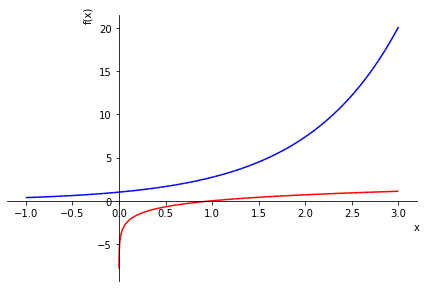

In [12]:
p = plot(Exp,(x,-1,3),line_color = 'b', show = False)
p.extend(plot(Log, (x,-1,3),line_color = 'r', show = False))
p.show()

二項分布のパラメータの最尤推定

In [13]:
from scipy.stats import binom
from scipy.optimize import minimize
import math
import numpy as np
import matplotlib.pyplot as plt

`minimize`関数を使うので尤度のマイナスをとる

In [14]:
def L(p): # negative likelihood
    return -binom.pmf(7, 10, p)

In [15]:
MLE1 = minimize(L, 0.5, bounds = [(0.01, 0.99)])
MLE1.x, MLE1.fun

(array([0.70000011]), array([-0.26682793]))

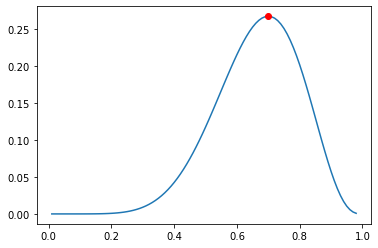

In [16]:
p = [i /100 for i in range(1,99)]
plt.plot(p, -np.vectorize(L)(p))
plt.plot(MLE1.x, -MLE1.fun, 'ro')
plt.show()

対数尤度のマイナス

In [17]:
def logL(p): # negative log likelihood
    return -math.log(binom.pmf(7, 10, p))

In [18]:
MLE2 = minimize(logL, 0.5, bounds = [(0.01, 0.99)])
MLE2.x, MLE2.fun

(array([0.69999999]), 1.3211512777668895)

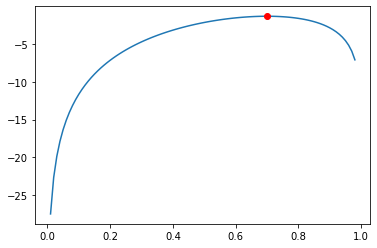

In [19]:
p = [i /100 for i in range(1,99)]
plt.plot(p, -np.vectorize(logL)(p))
plt.plot(MLE2.x, -MLE2.fun, 'ro')
plt.show()